In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Converting BGR to RGB
def BGR2RGB(x):
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    return x
# PLotting single image
def oneplt(x,title):
    plt.imshow(BGR2RGB(x)),plt.title(title)
    plt.axis("off")
    plt.show()
    
#PLotting multiple images using subplot    
def pltimage(img,title,value):
    plt.figure(figsize=(20,15))
    for i in range(value):
        plt.subplot(2,2,i+1)
        plt.imshow(BGR2RGB(img[i]))
        plt.title(title[i])
        plt.axis('off')
    return plt.show() 
## For gray images we need not to convert BGRtoRGB
def pltimage1(img,title,value):
    plt.figure(figsize=(10,8))
    for i in range(value):
        plt.subplot(2,3,i+1)
        plt.imshow(img[i],'gray')
        plt.title(title[i])
        plt.xticks([]),plt.yticks([])
    return plt.show() 

### Sharpening of Images
By altering our kernels we can implement sharpening, which has the effects of in strengthening or emphasizing edges in an image.

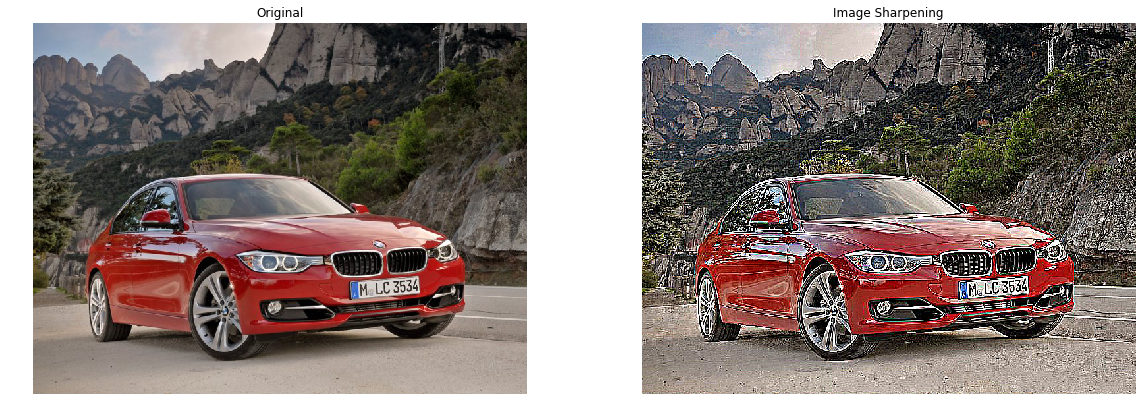

In [12]:
image = cv2.imread('Input/Image/bmw.jpg')
#cv2.imshow('Original', image)

# Create our shapening kernel, we don't normalize since the 
# the values in the matrix sum to 1
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

# applying different kernels to the input image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)

#cv2.imshow('Image Sharpening', sharpened)

titles = ["Original",'Image Sharpening']
images = [image,sharpened]
pltimage(images,titles,2)



### Thresholding, Binarization & Adaptive Thresholding
In thresholding, we convert a grey scale image to it's binary form

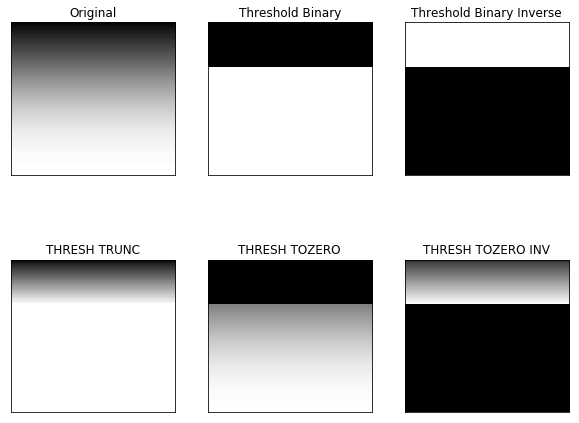

In [18]:
# Load our image as greyscale 
image = cv2.imread('Input/Image/gradient.jpg',0)
# cv2.imshow('Original', image)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)


# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)


# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)


# Values below 127 go to 0, above 127 are unchanged  
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)


# Resever of above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)


titles = ["Original",'Threshold Binary','Threshold Binary Inverse','THRESH TRUNC','THRESH TOZERO','THRESH TOZERO INV']
images = [image,thresh1,thresh2,thresh3,thresh4,thresh5]
pltimage1(images,titles,6)
    


### Adaptive thresholding

Smarter way of Image thresholding without mentioning thresholding value (i.e 127 like previous settings)

- **Adaptive Method** - It decides how thresholding value is calculated.
cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
**Block Size** - It decides the size of neighbourhood area.

**C** - It is just a constant which is subtracted from the mean or weighted mean calculated.

In [49]:
img = cv2.imread('Input/Image/sudoku.jpeg',0)
img = cv2.medianBlur(img,5)

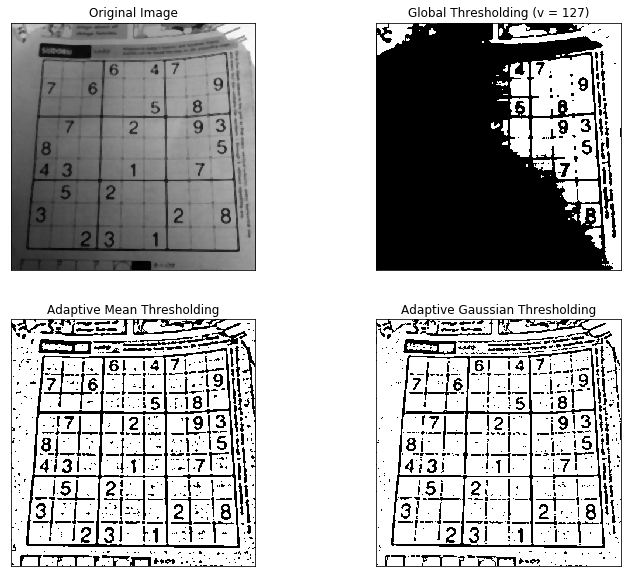

In [50]:
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)


titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img,th1,th2,th3]

plt.figure(figsize=(12,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


### Otsu’s Binarization

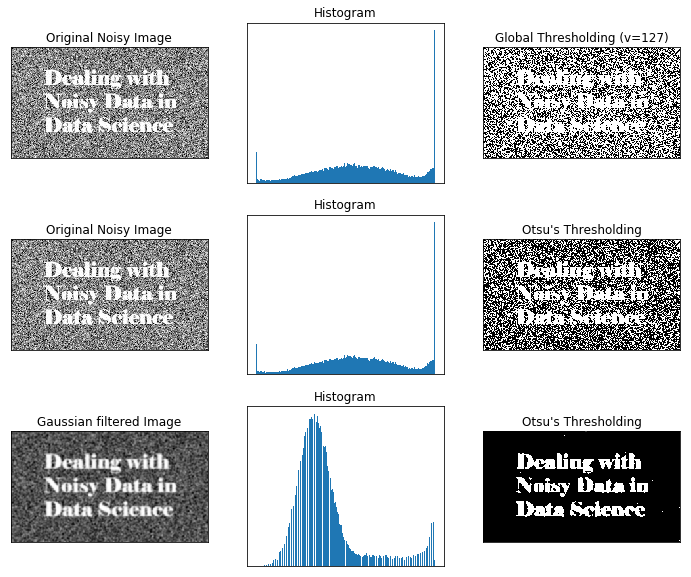

In [51]:
img = cv2.imread('Input/Image/noise.jpg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(12,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()